## Creating a graph

Создать пустой граф

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

## Nodes

Создаем одну одну за раз

In [3]:
G.add_node(1)

Добавляем список нод

In [4]:
G.add_nodes_from([2, 3])

##Edges - ребра

Одно ребро за раз

In [5]:
G.add_edge(1, 2)

In [6]:
e = (2, 3)

In [7]:
G.add_edge(*e) # unpack edge tuple*

Лист ребер

In [8]:
G.add_edges_from([(1, 2),(1, 3)])

Удаление всех нод и ребер

In [11]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present.

In [12]:
G.add_edges_from([(1, 2), (1, 3)])

In [13]:
G.add_node(1)

In [14]:
G.add_edge(1, 2)

In [15]:
G.add_node("spam")       # adds node "spam"

In [16]:
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

At this stage the graph G consists of 8 nodes and 2 edges, as can be seen by:

In [17]:
G.number_of_nodes()

8

In [18]:
G.number_of_edges()

2

We can examine them with

In [19]:
list(G.nodes())  # G.nodes() returns an iterator of nodes.

[1, 2, 3, 'spam', 'a', 'm', 's', 'p']

In [20]:
list(G.edges())  # G.edges() returns an iterator of edges.

[(1, 2), (1, 3)]

In [21]:
list(G.neighbors(1))  # G.neighbors(n) returns an iterator of neigboring nodes of n

[2, 3]

Removing nodes or edges has similar syntax to adding:

In [22]:
G.remove_nodes_from("spam")

In [23]:
list(G.nodes())

[1, 2, 3, 'spam']

In [24]:
G.remove_edge(1, 3)

Добавляем аттрибуты ребрам (цвет)

In [25]:
G.add_edge(1, 3)

In [26]:
G[1][3]['color']='blue'

### Graph attributes

Assign graph attributes when creating a new graph

In [28]:
G = nx.Graph(day="Friday")

In [29]:
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [30]:
G.graph['day'] = 'Monday'

In [31]:
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using `add_node(), add_nodes_from() or G.node`

In [32]:
G.add_node(1, time='5pm')

In [33]:
G.add_nodes_from([3], time='2pm')

In [34]:
G.node[1]

{'time': '5pm'}

In [35]:
G.node[1]['room'] = 714

In [36]:
list(G.nodes(data=True))

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

Note that adding a node to `G.node` does not add it to the graph, use `G.add_node()` to add new nodes.

### Edge attributes

Add edge attributes using `add_edge()`, `add_edges_from()`, subscript notation, or `G.edge`.

In [37]:
G.add_edge(1, 2, weight=4.7)

In [38]:
G.add_edges_from([(3, 4), (4, 5)], color='red')

In [39]:
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

In [40]:
G[1][2]['weight'] = 4.7

In [41]:
G.edge[1][2]['weight'] = 4

In [42]:
list(G.edges(data=True))

[(1, 2, {'color': 'blue', 'weight': 4}),
 (2, 3, {'weight': 8}),
 (3, 4, {'color': 'red'}),
 (4, 5, {'color': 'red'})]

The special attribute 'weight' should be numeric and holds values used by algorithms requiring weighted edges.

## Directed Graphs

The `DiGraph` class provides additional methods specific to directed edges, e.g. :meth:`DiGraph.out_edges`, `DiGraph.in_degree`, `DiGraph.predecessors`, `DiGraph.successors` etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() and degree() are equivalent to successors() and the sum of in_degree() and out_degree() respectively even though that may feel inconsistent at times.

In [55]:
DG = nx.DiGraph()

In [56]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [57]:
DG.out_degree(1, weight='weight')

0.5

In [58]:
DG.degree(1,weight='weight')

1.25

In [59]:
list(DG.successors(1))   # DG.successors(n) returns an iterator

[2]

In [60]:
list(DG.neighbors(1))   # DG.neighbors(n) returns an iterator

[2]

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using `Graph.to_undirected` or with

In [61]:
H = nx.Graph(G) # convert G to undirected graph

# Directed graph

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

colors = sns.color_palette('pastel', 5)
sns.set_palette(colors)

In [2]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [3]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

(-0.6575000823289163,
 1.1575000078231097,
 -1.0478907761761622,
 1.0478907563079471)

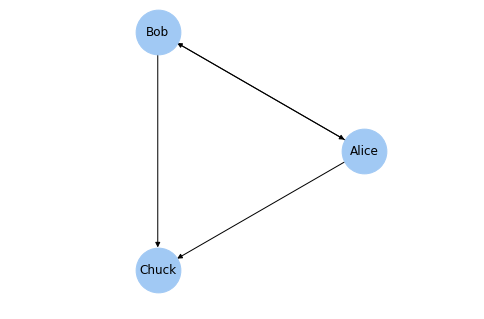

In [4]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')

## MultiGraphs

NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The `MultiGraph` and `MultiDiGraph` classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Shortest path is one example. Where results are well defined, e.g. `MultiGraph.degree` we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [62]:
MG = nx.MultiGraph()

In [63]:
MG.add_weighted_edges_from([(1, 2, .5), (1, 2, .75), (2, 3, .5)])

In [64]:
list(MG.degree(weight='weight'))  # MG.degree() returns a (node, degree) iterator

[(1, 1.25), (2, 1.75), (3, 0.5)]

In [65]:
GG = nx.Graph()

In [66]:
for n,nbrs in MG.adjacency():
    for nbr,edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

In [67]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by

* Applying classic graph operations, such as:
```
subgraph(G, nbunch)      - induce subgraph of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G)   - return a directed representation of G
```

* Using a call to one of the classic small graphs, e.g.

In [68]:
petersen = nx.petersen_graph()

In [69]:
tutte = nx.tutte_graph()

In [70]:
maze = nx.sedgewick_maze_graph()

In [71]:
tet = nx.tetrahedral_graph()

* Using a (constructive) generator for a classic graph, e.g.

In [72]:
K_5 = nx.complete_graph(5)

In [73]:
K_3_5 = nx.complete_bipartite_graph(3, 5)

In [74]:
barbell = nx.barbell_graph(10, 10)

In [75]:
lollipop = nx.lollipop_graph(10, 20)

* Using a stochastic graph generator, e.g.

In [76]:
er = nx.erdos_renyi_graph(100, 0.15)

In [77]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)

In [78]:
ba = nx.barabasi_albert_graph(100, 5)

In [79]:
red = nx.random_lobster(100, 0.9, 0.9)

* Reading a graph stored in a file using common graph formats, such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [80]:
nx.write_gml(red, "path.to.file")

In [81]:
mygraph = nx.read_gml("path.to.file")

Details on graph formats: :doc:`/reference/readwrite`

Details on graph generator functions: :doc:`/reference/generators`

## Analyzing graphs

The structure of G can be analyzed using various graph-theoretic functions such as:



In [82]:
G=nx.Graph()

In [83]:
G.add_edges_from([(1, 2), (1, 3)])

In [84]:
G.add_node("spam")       # adds node "spam"

In [85]:
nx.connected_components(G)

<generator object connected_components at 0x103ed7cd0>

In [86]:
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [87]:
sorted(d for n, d in nx.degree(G))

[0, 1, 1, 2]

In [88]:
nx.clustering(G)

{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}

Functions that return node properties return (node, value) tuple iterators.



In [89]:
nx.degree(G)

<generator object d_iter at 0x103ed7d20>

In [90]:
list(nx.degree(G))

[(1, 2), (2, 1), (3, 1), ('spam', 0)]

For values of specific nodes, you can provide a single node or an nbunch of nodes as argument. If a single node is specified, then a single value is returned. If an nbunch is specified, then the function will return a (node, degree) iterator.

In [91]:
nx.degree(G, 1)

2

In [92]:
G.degree(1)

2

In [93]:
G.degree([1, 2])

<generator object d_iter at 0x103ef00a0>

In [94]:
list(G.degree([1, 2]))

[(1, 2), (2, 1)]

Details on graph algorithms supported: :doc:`/reference/algorithms`



## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing package and will be imported if possible. See :doc:`/reference/drawing` for details.

Note that the drawing package in NetworkX is not yet compatible with Python versions 3.0 and above.

First import Matplotlib's plot interface (pylab works too)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

You may find it useful to interactively test code using "ipython -pylab", which combines the power of ipython and matplotlib and provides a convenient interactive mode.

To test if the import of networkx.drawing was successful draw G using one of

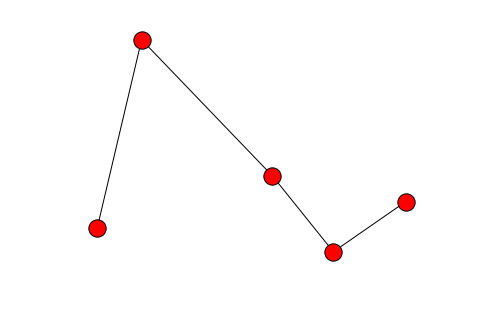

In [52]:
nx.draw(G)

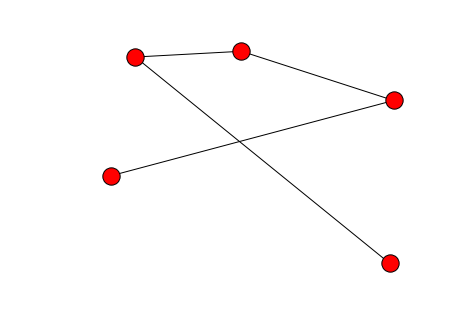

In [53]:
nx.draw_random(G)

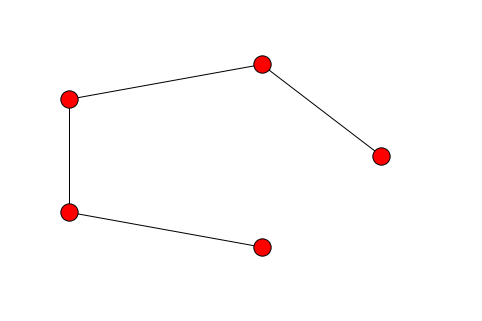

In [54]:
nx.draw_circular(G)

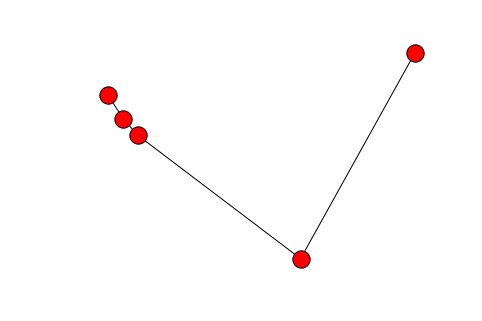

In [55]:
nx.draw_spectral(G)

when drawing to an interactive display. Note that you may need to issue a Matplotlib

In [56]:
plt.show()

command if you are not using matplotlib in interactive mode: (See Matplotlib FAQ )

To save drawings to a file, use, for example

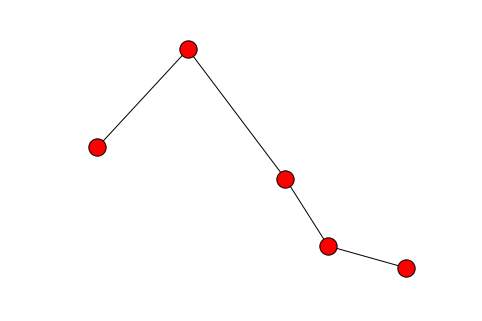

In [57]:
nx.draw(G)

In [102]:
plt.savefig("path.png")

writes to the file "path.png" in the local directory.

# Undirected graph

In [5]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

In [6]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

In [7]:
#drive_times is a dictionary that maps from pairs of cities to the driving times between them
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

In [8]:
G.add_edges_from(drive_times)

C:\ProgramData\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(-75.26365740740741, -70.73634259259258, 39.75451388888889, 43.245486111111106)

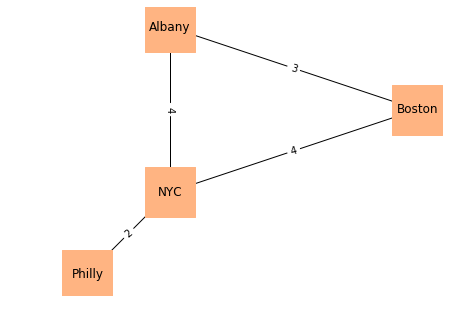

In [9]:
nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')

# Complete graph

In [10]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

In [11]:
#make_complete_graph makes a Graph with the given number of nodes and edges between all pairs of nodes.

def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

C:\ProgramData\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


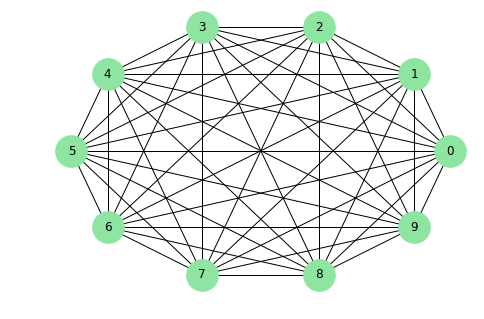

In [12]:
complete = make_complete_graph(10)
complete.number_of_nodes()

nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

# Связные графы


Граф является связным, если существует путь от каждого узла к каждому другому узлу

In [13]:
#To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [14]:
#In the complete graph, starting from node 0, we can reach all nodes:

reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [15]:
#We can use reachable_nodes to check whether a graph is connected:

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

In [16]:
is_connected(complete)

True